## Resume of the notebook:
1) Equaility constrained problem using Lagrange multipliers.

2) Idem, $f(x)= x^2+y^2+z^2$ , Constrains: $ x+y-5 = 0$ and $x+z+y-15 = 0$

3) Using SciPy, Minimize $x_1^2+3x_2^2+4$

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

# 1) Optimization: equality constrained problem

#### Objective function: $f(x)= 0.25x_1^2+x_2^2$ 
#### Constrain: $10-x_1-x_2=0$ 


#### Lagrange Equation: $L(x_1,x_2,\lambda)= 0.25x_1^2+x_2^2 + \lambda*(10-x_1-x_2) $

### Derivative of Lagrangian with respect to each variable: 
$\frac{\partial L}{\partial x_1}= 0.5x_1-\lambda ,  \frac{\partial L}{\partial x_2}= 2x_2-\lambda , 
\frac{\partial L}{\partial \lambda}= -x_1 - x_2$ 

In [3]:
A = np.array([[0.5,0,-1], [0,2,-1], [-1,-1,0]])
b = np.array([0, 0, -10])
print(A)


x = np.linalg.inv(A).dot(b)
print(x)

[[ 0.5  0.  -1. ]
 [ 0.   2.  -1. ]
 [-1.  -1.   0. ]]
[8. 2. 4.]


In [4]:
opt_val = lambda x: 0.25*x[0]**2 + x[1]**2
print(f'Minimum value: {opt_val(x)}')

Minimum value: 20.0


#### Using a different constrain $-x_2-2=0$

In [5]:
A2 = np.array([[0.5,0,-2], [0,2,-1], [0,-1,0]])
b2 = np.array([0, 0, 2])
print(A2)

x2 = np.linalg.inv(A2).dot(b2)

[[ 0.5  0.  -2. ]
 [ 0.   2.  -1. ]
 [ 0.  -1.   0. ]]


In [6]:
print(f'Optimum value: {opt_val(x2)}')

Optimum value: 68.0


#### 2)  Objective function: $f(x)= x^2+y^2+z^2$ 
#### Constrains: $ x+y-5 = 0$ and $x+z+y-15 = 0$

#### Lagrange Equation: $L(x,y,z,\lambda_1,\lambda_2)= x^2+y^2+z^2 + \lambda_1*(x+y-5) + \lambda_2*(x-z+y-15)  $

In [7]:
A3 = np.array([[2, 0, 0, 1, 1],
              [ 0, 2, 0, 1, 1],
              [ 0, 0, 2, 0, -1],
              [ 1, 1, 0, 0, 0],
              [ 1, 1, -1, 0, 0]])
b3= np.array([0, 0, 0, 5, 15])

print(A3)


[[ 2  0  0  1  1]
 [ 0  2  0  1  1]
 [ 0  0  2  0 -1]
 [ 1  1  0  0  0]
 [ 1  1 -1  0  0]]


In [8]:
x3 = np.linalg.inv(A3).dot(b3)
print(x3)

[  2.5   2.5 -10.   15.  -20. ]


In [9]:
opt_val2 = lambda x: x[0]**2 + x[1]**2 + x[2]**2
print(f'Optimum value: {opt_val2(x3)}')

Optimum value: 112.5


### Using just the first constrain

#### Lagrange Equation: $L(x,y,z,\lambda)= x^2+y^2+z^2 + \lambda*(x+y-5)$

In [10]:
A4 = np.array([[2, 0, 0, 1],
              [ 0, 2, 0, 1],
              [ 0, 0, 2, 0],
              [ 0, 1, 1, 0]])

b4 = np.array([0, 0, 0, 5])
print(A4)


x4 = np.linalg.inv(A).dot(b)
print(x4)

[[2 0 0 1]
 [0 2 0 1]
 [0 0 2 0]
 [0 1 1 0]]
[8. 2. 4.]


In [11]:
opt_val2(x4[:3]) # = 84, thus we can improve the minimum.

84.0

### 1.3) Martins and Ning, Chapter 1 Problem 5.4 (using Scipy)
#### Minimize $x_1^2+3x_2^2+4$
#### by varying $x_1,x_2$
#### subject to $x_2 \ge1$  and $x_1^2+4x_2^2 \le 4$


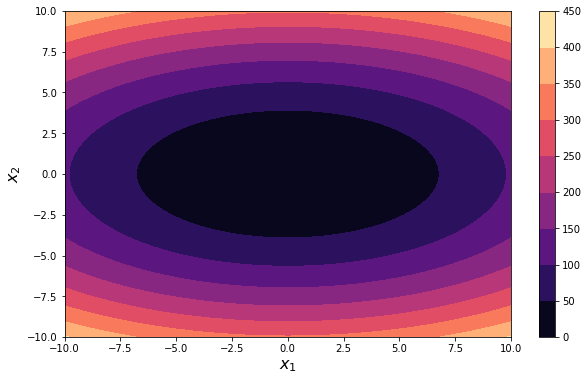

In [12]:
x_arr = np.linspace(-10., 10., 100)
y_arr = np.linspace(-10., 10., 100)
x, y = np.meshgrid(x_arr, y_arr)
# define z=f(x,y)
z_func = lambda t : t[0]**2+3*t[1]**2+4
z = z_func((x,y))


figure , axe =plt.subplots(1,1, figsize=(10,6))
cont_map = axe.contourf(x, y, z, cmap='magma')
figure.colorbar(cont_map)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

### b) As can be seen, the unconstrained optimum of the function is $(x_1,x_2)=(0,0)$, as any other values will maximize the output because $x_1$ and $x_2$ are squared.

Lagrangian equation:  $x_1^2+3x_2^2+4 + \lambda *(x_2-1) + \mu *(x_1^2+4x_2^2-4)$


### Solve for unconsontrained

In [13]:
OF = lambda t : t[0]**2+3*t[1]**2+4

from scipy.optimize import minimize

f = minimize(OF, [1,1], method='SLSQP')

f.x # (0,0) as expected.

array([7.80536857e-10, 3.54789545e-10])

### Solve with constains using scipy

In [119]:
from scipy.optimize import NonlinearConstraint

con1= lambda x : x[1]-1
nlc1=NonlinearConstraint(con1, 0, np.inf)
con2= lambda x : x[0]**2+4*x[1]**2-4
nlc2=NonlinearConstraint(con2, -np.inf, 0)

#bounds=((-np.inf,np.inf),(-np.inf,np.inf))

x0,x1=0,0
f=minimize(OF,
           [x0,x1],
#         bounds=bnds,
           constraints=[nlc1,nlc2],
           options={'maxiter': 100, 'ftol': 1e-06, 'iprint': 2,'disp': True})
           

  NIT    FC           OBJFUN            GNORM
    1     4     7.000000E+00     5.960464E-08
    2     8     7.000000E+00     1.000000E+00
    3    10     7.000000E+00     6.000000E+00
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.000000000000019
            Iterations: 3
            Function evaluations: 10
            Gradient evaluations: 3


In [120]:
print(f'The optimum value after {f.nit} iterations is {np.round(f.fun,3)}')
print(f'The values of x1={f.x[0]} and x2={np.round(f.x[1],5)}')

The optimum value after 3 iterations is 7.0
The values of x1=0.0 and x2=1.0


#### Removing constrain 1:

In [117]:
con2= lambda x : x[0]**2+4*x[1]**2-4
nlc2=NonlinearConstraint(con2, -np.inf, 0)


x0,x1=0,0
f2=minimize(OF,
           [x0,x1],
           constraints=[nlc2],
           options={'maxiter': 100, 'ftol': 1e-06, 'iprint': 2,'disp': True})

  NIT    FC           OBJFUN            GNORM
    1     3     4.000000E+00     5.960464E-08
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.0
            Iterations: 1
            Function evaluations: 3
            Gradient evaluations: 1


In [118]:
f2.x # Same as unconstrained solution.

array([0., 0.])

#### Removing constrain 2:

In [121]:
con1= lambda x : x[1]-1
nlc1=NonlinearConstraint(con1, 0, np.inf)

x0,x1=0,0
f3=minimize(OF,
           [x0,x1],
           constraints=[nlc1],
           options={'maxiter': 100, 'ftol': 1e-06, 'iprint': 2,'disp': True})

  NIT    FC           OBJFUN            GNORM
    1     4     7.000000E+00     5.960464E-08
    2     8     7.000000E+00     1.000000E+00
    3    10     7.000000E+00     6.000000E+00
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.000000000000019
            Iterations: 3
            Function evaluations: 10
            Gradient evaluations: 3


In [123]:
f3.x # Same optimum as with 2 constrains.

array([0., 1.])